In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error


In [112]:
df = pd.read_excel("/content/temperature.xlsx")

In [113]:
df.head()

,Date,Daily minimum temperatures
0,1981-01-01 00:00:00,20.7
1,1981-02-01 00:00:00,17.9
2,1981-03-01 00:00:00,18.8
3,1981-04-01 00:00:00,14.6
4,1981-05-01 00:00:00,15.8


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3647 non-null   object 
 1   Daily minimum temperatures  3647 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


In [115]:
df["Date"] = pd.to_datetime(df['Date'])

In [116]:
df = df.set_index('Date').sort_index()

In [117]:
df.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,15.3
1981-01-03,17.8
1981-01-04,16.7
1981-01-05,8.6


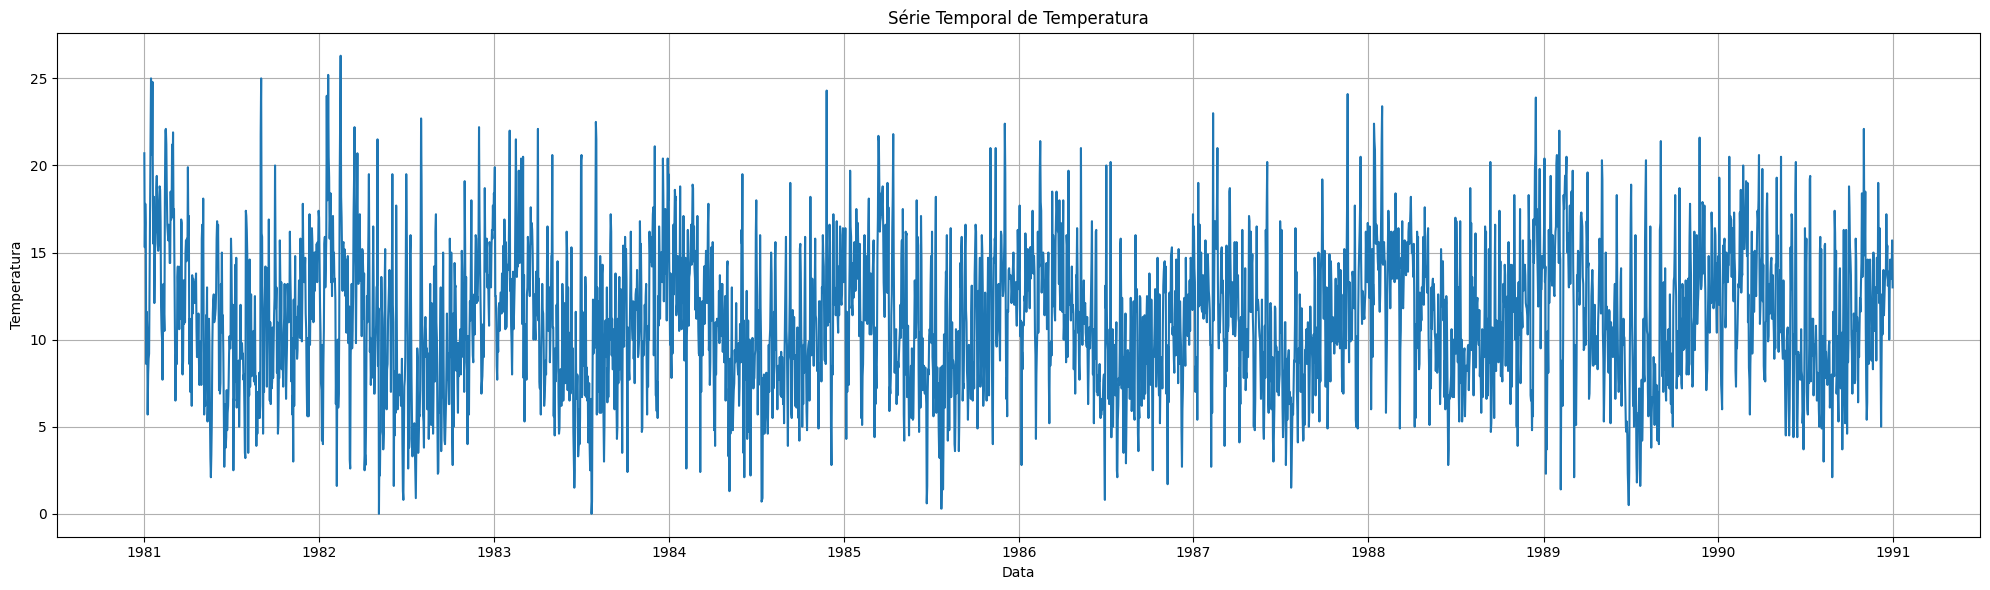

In [118]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['Daily minimum temperatures'])  # Usamos df.index para garantir que os dias sejam plotados corretamente
plt.title('Série Temporal de Temperatura')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
# Decomposição da série temporal para identificar componentes (tendência, sazonalidade, resíduos)

decomposition = seasonal_decompose(df['Daily minimum temperatures'], model='additive', period=365)

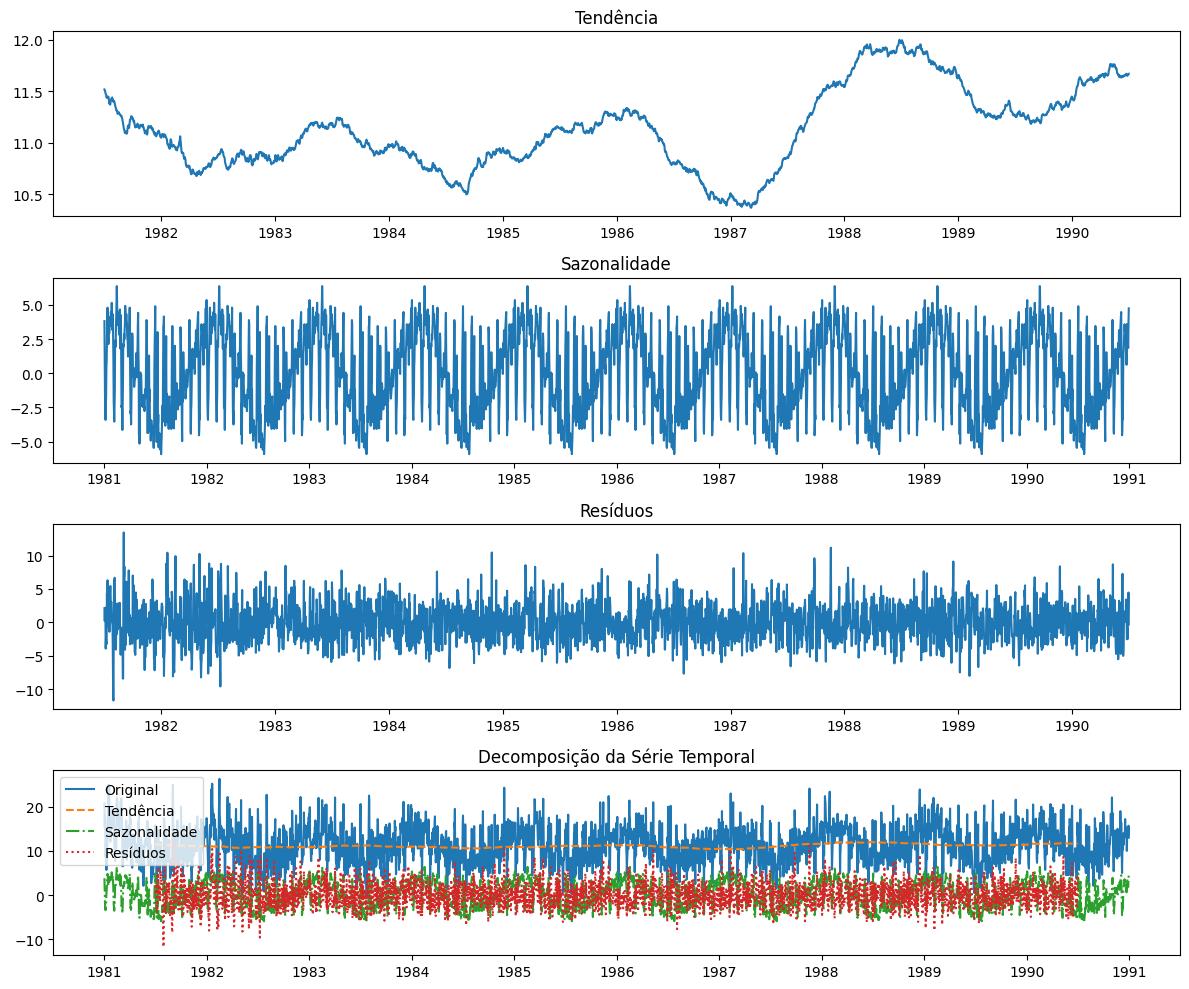

In [120]:
# Plotar a decomposição
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend)
plt.title('Tendência')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal)
plt.title('Sazonalidade')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid)
plt.title('Resíduos')

plt.subplot(4, 1, 4)
plt.plot(df['Daily minimum temperatures'], label='Original')
plt.plot(decomposition.trend, label='Tendência', linestyle='--')
plt.plot(decomposition.seasonal, label='Sazonalidade', linestyle='-.')
plt.plot(decomposition.resid, label='Resíduos', linestyle=':')
plt.title('Decomposição da Série Temporal')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

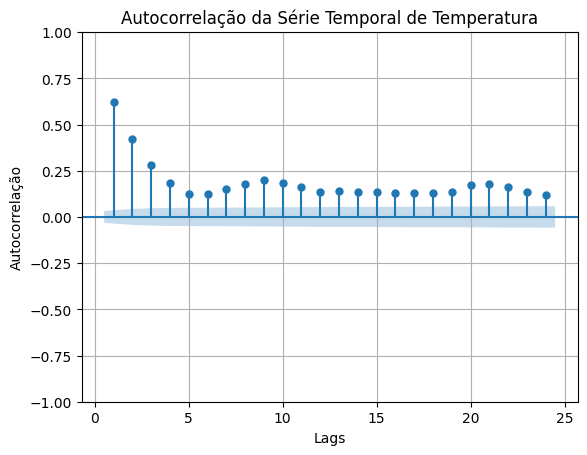

In [121]:
plt.figure(figsize=(12, 6))

plot_acf(df['Daily minimum temperatures'], lags=24, title='Autocorrelação da Série Temporal de Temperatura', zero=False)
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

In [122]:
# Teste de estacionariedade.
# A hipótese nula é que a série não é estacionária
# Ou seja, se o p-valor for menor que 0,05, rejeitamos
# que a série não é estacionária. Caso seja maior, não podemos
# descartar que a série não é estacionária
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Daily minimum temperatures'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-3.331541412968857
p-valor:0.01352611219545271


In [162]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Utilizando auto_arima para encontrar os melhores parâmetros
# Define seasonal=True para considerar componentes sazonais
auto_model = auto_arima(train['Daily minimum temperatures'], seasonal=True, m=6, trace=True,
                        max_p=3, max_d=1, max_q=3, max_P=3, max_D=1, max_Q=1)

# Ajuste do modelo aos dados de treino
auto_model.fit(train['Daily minimum temperatures'])

# Previsão com dados de teste
forecast = auto_model.predict(n_periods=len(test))

# Avaliação do modelo usando o erro quadrático médio (RMSE)
rmse = mean_squared_error(test['Daily minimum temperatures'], forecast, squared=False)
print(f'RMSE: {rmse}')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=15065.197, Time=8.95 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=16438.385, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=15084.818, Time=2.95 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=15503.287, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=22694.113, Time=0.06 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=15072.475, Time=2.96 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=15072.443, Time=4.14 sec
 ARIMA(2,0,2)(2,0,1)[6] intercept   : AIC=15060.639, Time=18.09 sec
 ARIMA(2,0,2)(2,0,0)[6] intercept   : AIC=15074.463, Time=10.06 sec
 ARIMA(2,0,2)(3,0,1)[6] intercept   : AIC=15052.502, Time=30.68 sec
 ARIMA(2,0,2)(3,0,0)[6] intercept   : AIC=15075.521, Time=18.94 sec
 ARIMA(1,0,2)(3,0,1)[6] intercept   : AIC=15048.535, Time=27.23 sec
 ARIMA(1,0,2)(2,0,1)[6] intercept   : AIC=15061.659, Time=16.36 sec
 ARIMA(1,0,2)(3,0,0)[6] intercept   : AIC=15073.287, Time=18.40 sec
 ARIMA(1,0,2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [133]:
# Agora que sabemos os melhores parâmetros, vamos criar um modelo SARIMAX
# (versão do arima com parametros para sazonalidade)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df,order=(1,0,2), seasonal_order=(3,0,1,6))
resultado_sarimax = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [154]:
predicoes = resultado_sarimax.get_prediction(start=-300)
predicao_media = predicoes.predicted_mean

In [155]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], limites_acima[0]

(5.591209570931274, 18.279792121532573)

In [156]:
predicao_media[0]

11.935500846231923

In [157]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

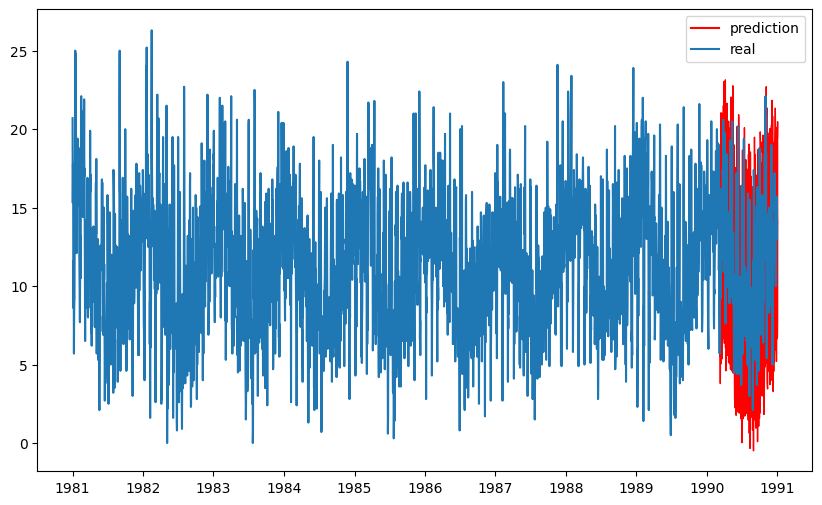

In [158]:

plt.figure(figsize=(10,6))
plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values, label='real')
plt.legend()
plt.show()

In [159]:
from math import sqrt
# Calcula o erro quadrático médio da previsão SARIMA para os últimos 300 valores do DataFrame
rmse_sarima = sqrt(mean_squared_error(df[-300:].values,predicao_media.values))
print(rmse_sarima)

3.1298852476824623


In [152]:
# Obtenha a previsão para os próximos 90 dias (3 meses)
forecast = resultado_sarimax.get_forecast(steps=90)

# Obtenha os valores previstos
forecast_values = forecast.predicted_mean

# Obtenha os limites inferiores e superiores do intervalo de confiança
intervalo_confianca = forecast.conf_int()
limites_abaixo = intervalo_confianca.iloc[:, 0]
limites_acima = intervalo_confianca.iloc[:, 1]

# Crie um DataFrame para armazenar as previsões e os limites do intervalo de confiança
previsoes = pd.DataFrame({'Previsão': forecast_values, 'Limite inferior': limites_abaixo, 'Limite superior': limites_acima})

# Defina o índice do DataFrame para as datas correspondentes às previsões
previsoes.index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')

# Exiba as previsões
print(previsoes)

             Previsão  Limite inferior  Limite superior
1991-01-01  12.426300         6.082032        18.770568
1991-01-02  13.154187         6.118511        20.189862
1991-01-03  13.121896         6.053599        20.190194
1991-01-04  13.048440         5.947695        20.149186
1991-01-05  13.158093         6.025070        20.291115
...               ...              ...              ...
1991-03-27  13.002632         4.264744        21.740519
1991-03-28  12.949347         4.193510        21.705184
1991-03-29  12.929097         4.155360        21.702833
1991-03-30  12.928027         4.136440        21.719613
1991-03-31  12.957080         4.147693        21.766466

[90 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


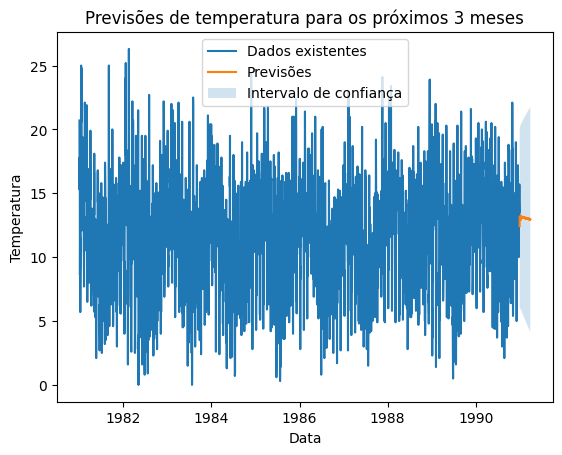

In [161]:
# Crie um gráfico das previsões ao lado dos dados existentes
fig, ax = plt.subplots()
ax.plot(df.index, df['Daily minimum temperatures'], label='Dados existentes')
ax.plot(previsoes.index, previsoes['Previsão'], label='Previsões')
ax.fill_between(previsoes.index, previsoes['Limite inferior'], previsoes['Limite superior'], alpha=0.2, label='Intervalo de confiança')
ax.set_xlabel('Data')
ax.set_ylabel('Temperatura')
ax.set_title('Previsões de temperatura para os próximos 3 meses')
ax.legend()
plt.show()